In [1]:
from jax.lib import xla_bridge
print(xla_bridge.get_backend().platform)

gpu


In [2]:
%load_ext autoreload
%autoreload 2
%pylab inline

import tensorflow as tf 
import numpy as np
from chainconsumer import ChainConsumer
import cmasher as cmr
import seaborn as sn
import pickle

'unset XLA_FLAGS'


Populating the interactive namespace from numpy and matplotlib


2023-09-26 15:12:27.983337: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/gpfslocalsup/pub/anaconda-py3/2021.05/envs/python-3.10.4/lib/python3.10/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.14) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


'unset XLA_FLAGS'

## Load data

In [3]:
with open("/gpfsdswork/projects/rech/ykz/ulm75uc/VMIM-vs-MSE-/data/sample_nd_mse.pkl", 'rb') as g:
    sample_nd_mse = pickle.load(g)
    
with open("/gpfsdswork/projects/rech/ykz/ulm75uc/VMIM-vs-MSE-/data/sample_nd_vmim.pkl", 'rb') as g:
    sample_nd_vmim = pickle.load(g)
    
with open("/gpfsdswork/projects/rech/ykz/ulm75uc/VMIM-vs-MSE-/data/sample_nd_mae.pkl", 'rb') as g:
    sample_nd_mae = pickle.load(g) 

sample_ff=np.load("/gpfsdswork/projects/rech/ykz/ulm75uc/VMIM-vs-MSE-/data/posterior_full_field__256N_10ms_27gpa_0.26se.npy",allow_pickle=True)

sample_ps=np.load("/gpfsdswork/projects/rech/ykz/ulm75uc/VMIM-vs-MSE-/data/posterior_power_spectrum__256N_10ms_27gpa_0.26se.npy",allow_pickle=True)





In [4]:
fid_params=np.array([0.2664, 0.0492, 0.831,0.6727,0.9645, -1.0])
name_parameters= ['$\Omega_c$', '$\Omega_b$', '$\sigma_8$', '$h_0$', '$n_s$', '$w_0$']

In [5]:
palette1=sn.color_palette("blend:#7AB,#EDA")

In [6]:
palette1

[(0.4666666666666667, 0.6666666666666666, 0.7333333333333333),
 (0.56, 0.7066666666666667, 0.72),
 (0.6533333333333333, 0.7466666666666667, 0.7066666666666667),
 (0.7466666666666666, 0.7866666666666666, 0.6933333333333332),
 (0.8400000000000001, 0.8266666666666667, 0.6799999999999999),
 (0.9333333333333333, 0.8666666666666667, 0.6666666666666666)]

In [7]:
palette2=sn.color_palette("viridis")

In [8]:
palette2

[(0.275191, 0.194905, 0.496005),
 (0.212395, 0.359683, 0.55171),
 (0.153364, 0.497, 0.557724),
 (0.122312, 0.633153, 0.530398),
 (0.288921, 0.758394, 0.428426),
 (0.626579, 0.854645, 0.223353)]

In [9]:
palette3=sn.color_palette("magma")

In [10]:
palette3

[(0.135053, 0.068391, 0.315),
 (0.372116, 0.092816, 0.499053),
 (0.594508, 0.175701, 0.501241),
 (0.828886, 0.262229, 0.430644),
 (0.973381, 0.46152, 0.361965),
 (0.997341, 0.733545, 0.505167)]

In [11]:
rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "white",
    "axes.titlecolor": "white",
    "axes.facecolor": "#111111",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "lightgray",
    "figure.facecolor": "#111111",
    "figure.edgecolor": "#111111",
    # "savefig.facecolor": "#111111",
    # "savefig.edgecolor": "#111111"
})

In [19]:
col = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

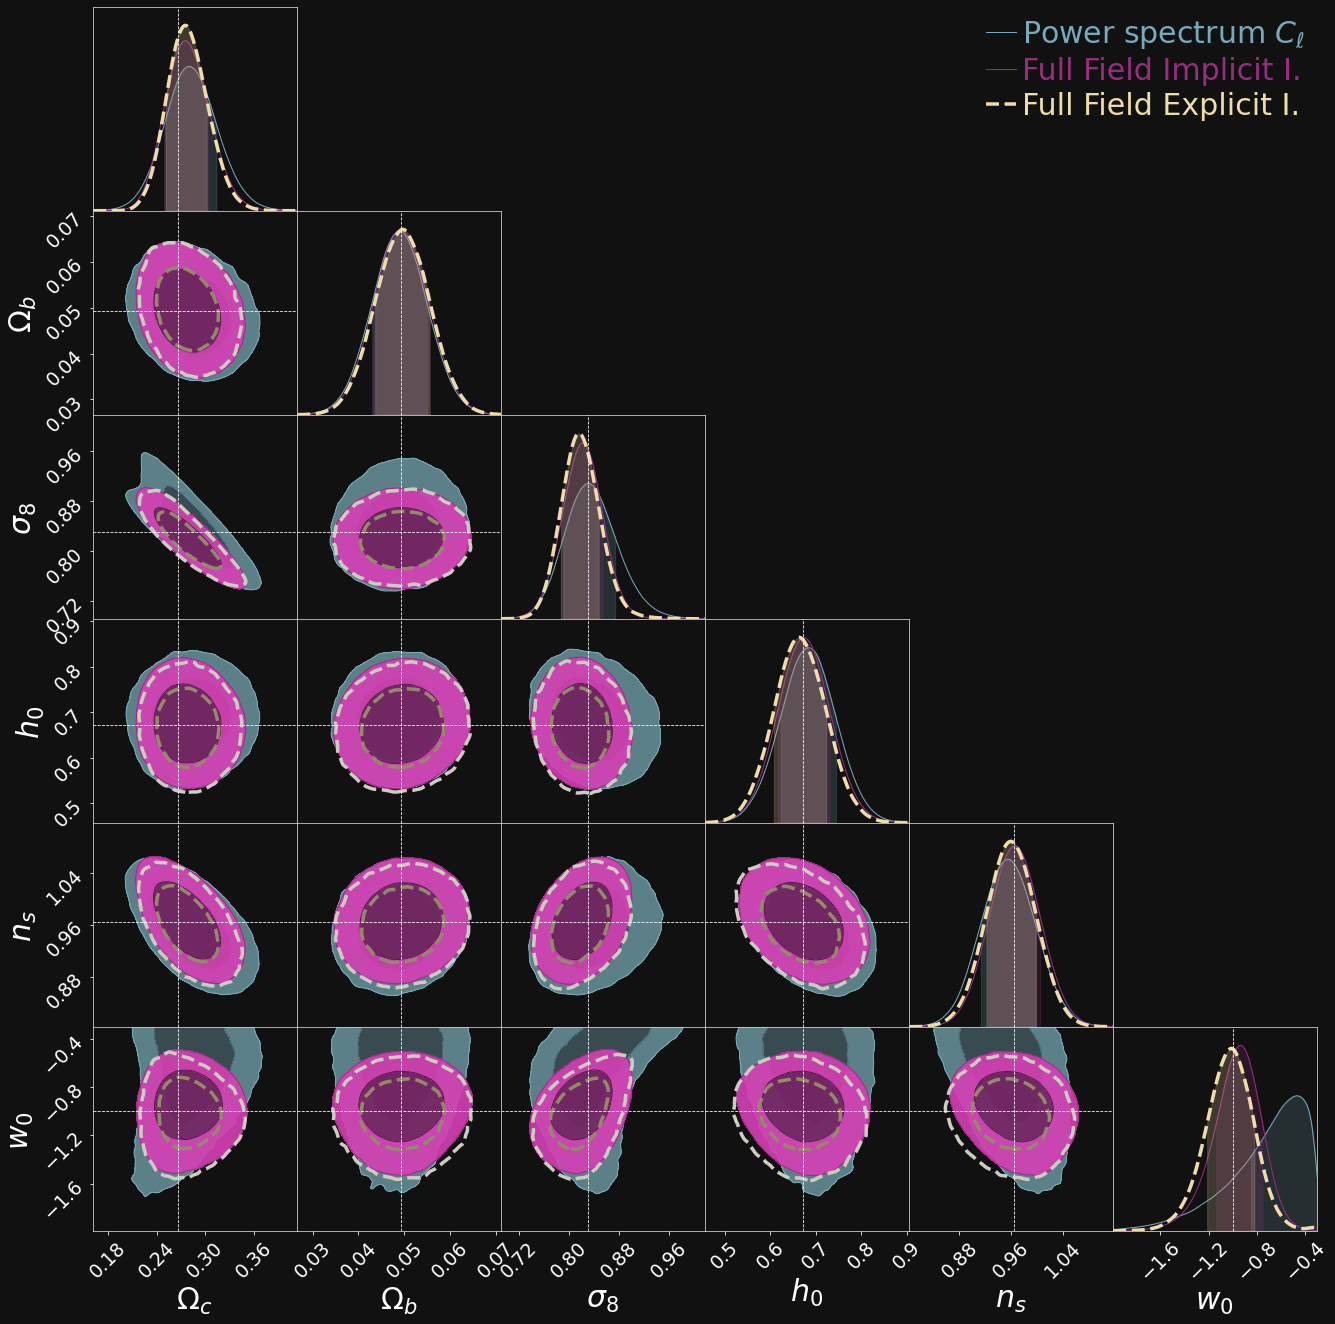

In [33]:
c = ChainConsumer()
c.add_chain([sample_ps[:,i] for i in range(6)], parameters= name_parameters, name = 'Power spectrum $C_{\ell}$',)
c.add_chain([sample_nd_vmim[:,i] for i in range(6)], parameters= name_parameters, name = 'Full Field Implicit I.')
c.add_chain([sample_ff[:,i] for i in range(6)], parameters= name_parameters, name = 'Full Field Explicit I.')
c.configure(legend_kwargs={'fontsize': 30}, linestyles=['-','-','--'],linewidths=[1,1,3.5],shade=[True,True,False], shade_alpha=[0.5, 0.9, 3],  flip=False, colors=[array(palette1[0]),array(palette3[2]),array(palette1[5])], tick_font_size=19, label_font_size=30)
c.configure_truth(color='w', ls="--", linewidth=.8)
fig = c.plotter.plot(truth=fid_params, figsize=2.0, )
fig.set_size_inches(2 + fig.get_size_inches())

plt.savefig('../figures/contours_posterior_imp_ex_ps.png', dpi=150, transparent=True)

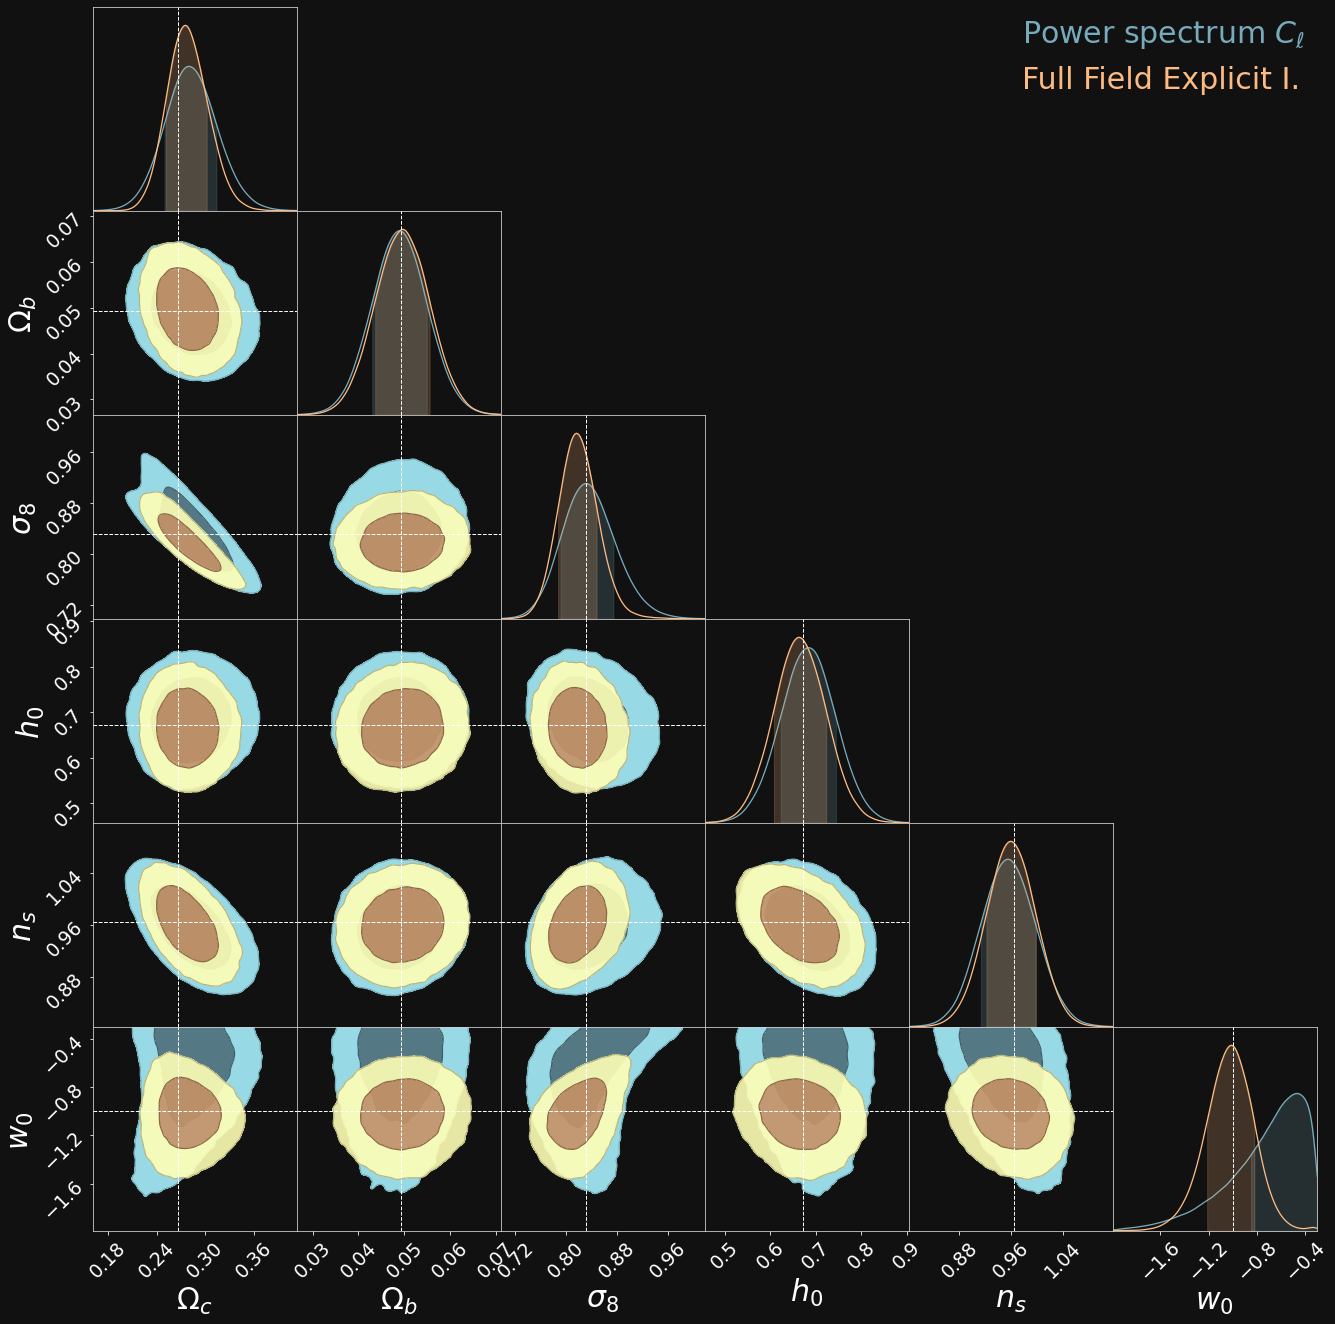

In [13]:
c = ChainConsumer()
c.add_chain([sample_ps[:,i] for i in range(6)], parameters= name_parameters, name = 'Power spectrum $C_{\ell}$',)
c.add_chain([sample_ff[:,i] for i in range(6)], parameters= name_parameters, name = 'Full Field Explicit I.')
c.configure(shade=True,legend_kwargs={'fontsize': 30}, linewidths=1.3, shade_alpha=[0.9, 0.9], bar_shade=True, flip=False, colors=[array(palette1[0]),array(palette3[-1])], tick_font_size=19, label_font_size=30)
c.configure_truth(color='w', ls="--", linewidth=1.0)
fig = c.plotter.plot(truth=fid_params, figsize=2.0, )
fig.set_size_inches(2 + fig.get_size_inches())

#plt.savefig('../figures/contours_posterior_ps_hmc_.png', dpi=250, transparent=True)

Font size is 165


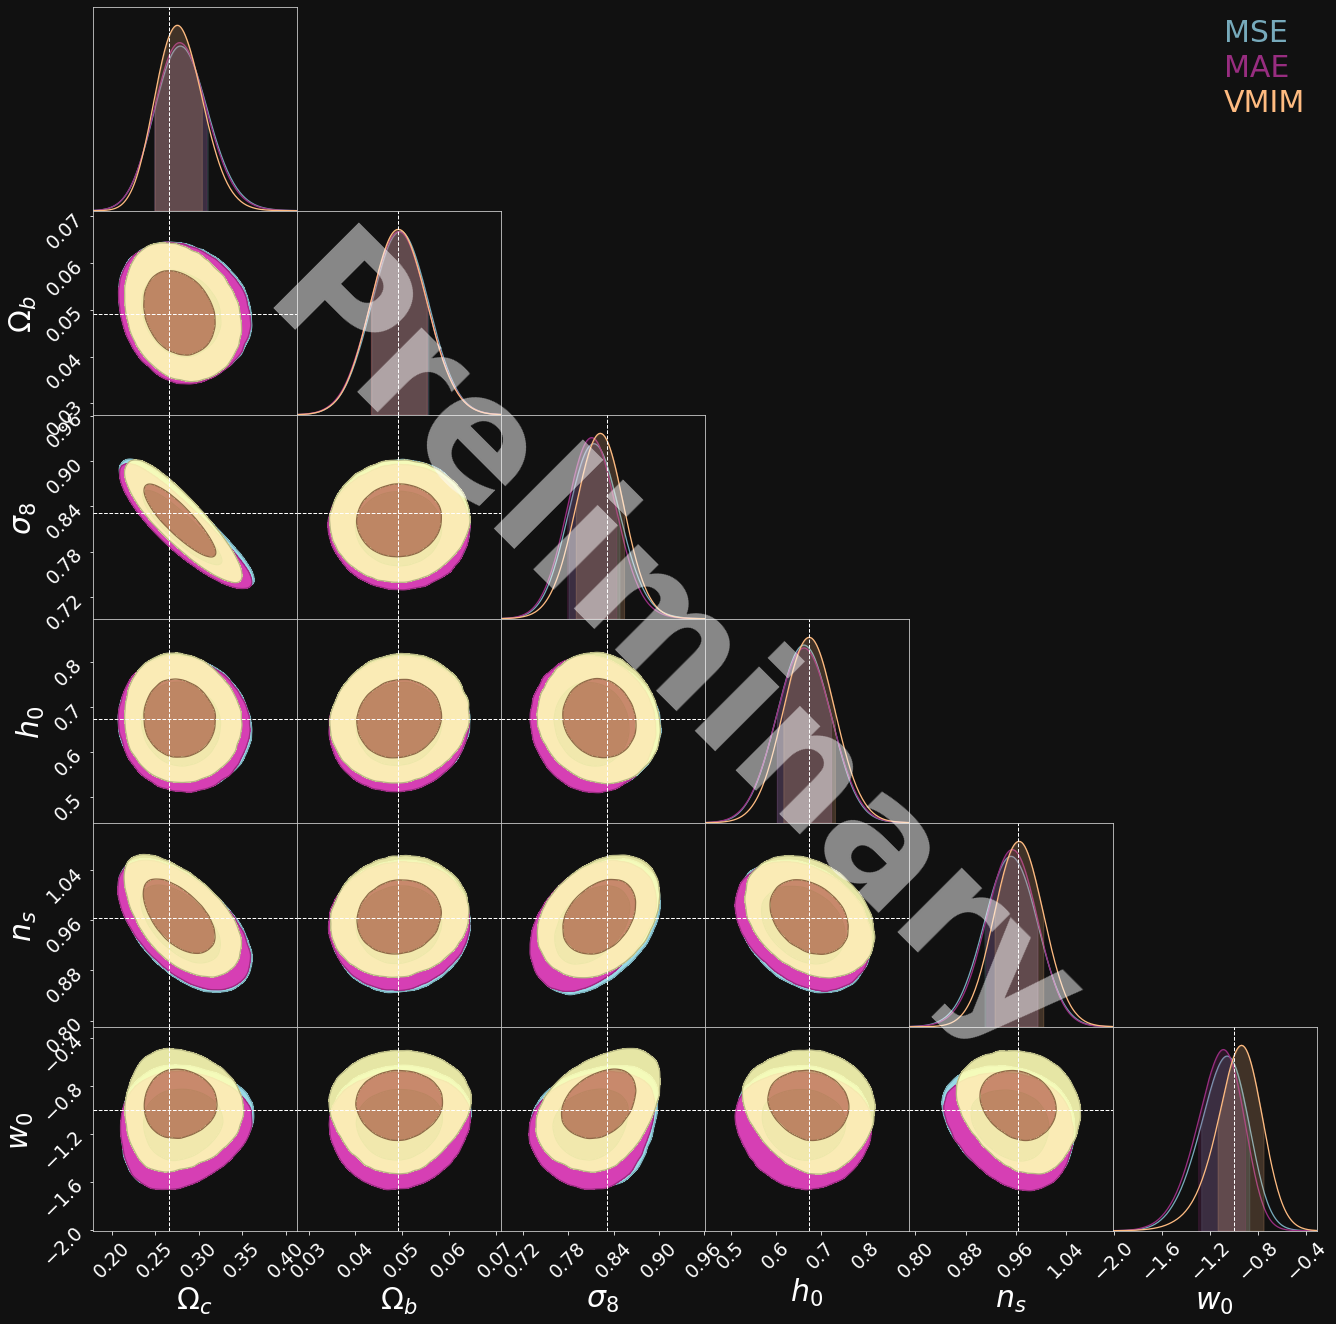

In [14]:
c = ChainConsumer()
c.add_chain([sample_nd_mse[:,i] for i in range(6)], parameters= name_parameters, name = 'MSE',)
c.add_chain([sample_nd_mae[:,i] for i in range(6)], parameters= name_parameters, name = 'MAE')
c.add_chain([sample_nd_vmim[:,i] for i in range(6)], parameters= name_parameters, name = 'VMIM')
kwargs = {"color": "white", "alpha": 0.5,  "usetex": False, "weight": "bold"}
c.configure(shade=True,legend_kwargs={'fontsize': 30}, linewidths=1.3, shade_alpha=[0.9, 1, 0.9], bar_shade=True, flip=False, colors=[array(palette1[0]),array(palette3[2]),array(palette3[-1])], tick_font_size=19, label_font_size=30,watermark_text_kwargs=kwargs)
c.configure_truth(color='w', ls="--", linewidth=1.0)
fig = c.plotter.plot(watermark="Preliminary", truth=fid_params, figsize=2.0, )
fig.set_size_inches( 2 + fig.get_size_inches())

#plt.savefig('../figures/contours_posterior_summaries_.png', dpi=250, transparent=True)


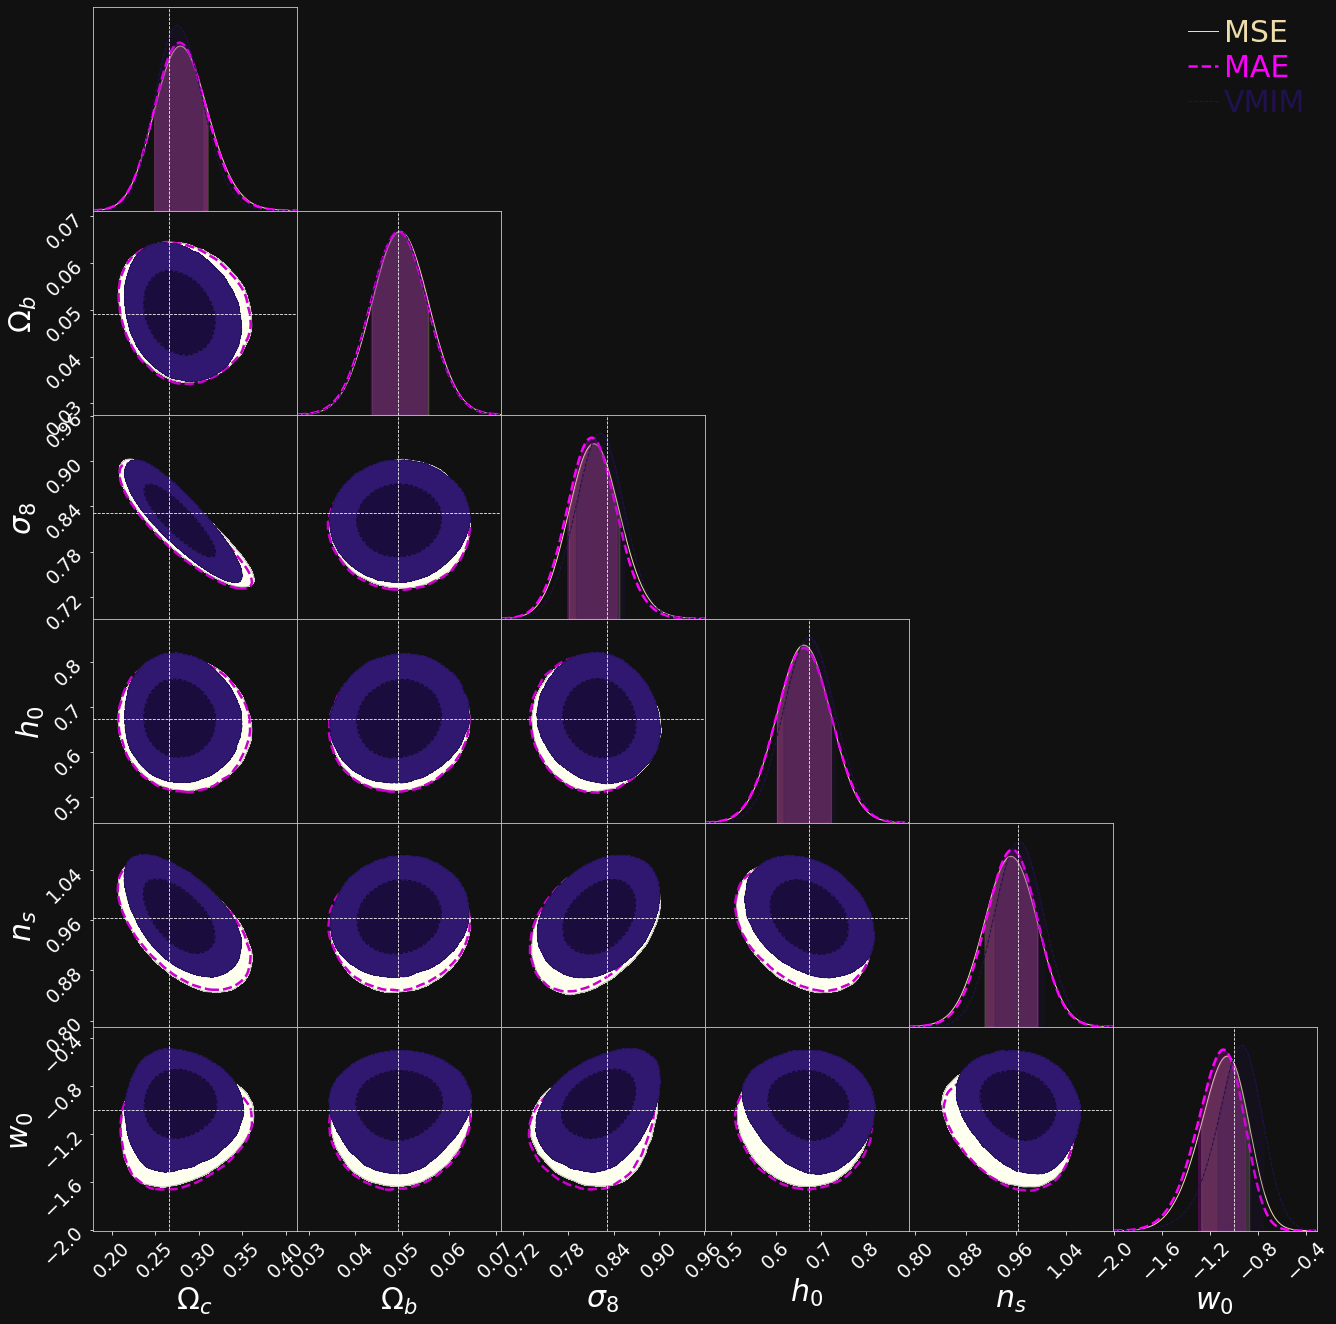

In [48]:
c = ChainConsumer()
c.add_chain([sample_nd_mse[:,i] for i in range(6)], parameters= name_parameters, name = 'MSE',)
c.add_chain([sample_nd_mae[:,i] for i in range(6)], parameters= name_parameters, name = 'MAE')
c.add_chain([sample_nd_vmim[:,i] for i in range(6)], parameters= name_parameters, name = 'VMIM')
kwargs = {"color": "white", "alpha": 0.5,  "usetex": False, "weight": "bold"}
c.configure(legend_kwargs={'fontsize': 30}, linestyles=['-','--','--'],  shade_alpha=[1, 1, 1],linewidths=[1,2.5,1],shade=[True,False,True], bar_shade=True, flip=False, colors=[array(palette1[-1]),"#FF00FF",array(palette3[0])], tick_font_size=19, label_font_size=30,watermark_text_kwargs=kwargs)
c.configure_truth(color='w', ls="--", linewidth=.8)
fig = c.plotter.plot( truth=fid_params, figsize=2.0, )
fig.set_size_inches( 2 + fig.get_size_inches())

plt.savefig('../figures/contours_posterior_summaries_.png', dpi=150, transparent=True)


In [15]:
theta_max=10
EXTENT = (-0.5 * theta_max, 0.5 * theta_max, -0.5 * theta_max, 0.5 * theta_max)
cmap = cmr.eclipse

In [16]:
m_data=np.load("/gpfsdswork/projects/rech/ykz/ulm75uc/sbi_lens/sbi_lens/data/m_data__256N_10ms_27gpa_0.26se.npy",allow_pickle=True)


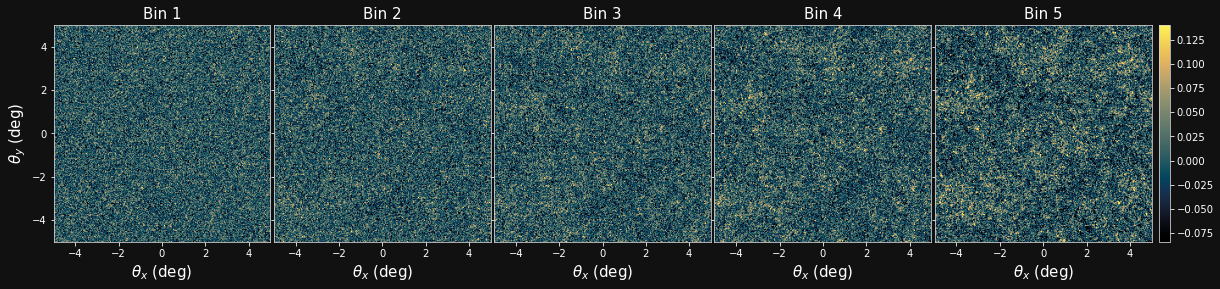

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import numpy as np

n_nz_bins=5
fig = plt.figure(figsize=(4 * n_nz_bins, 7))
std_kmap = np.std(m_data[...,-1])
grid = AxesGrid(fig, 111,
                nrows_ncols=(1, 5),
                axes_pad=0.05,
                cbar_mode='single',
                cbar_location='right',
                cbar_pad=0.1
                )

for ax,i in zip(grid,range(n_nz_bins)):
    im = ax.imshow(m_data[...,i],cmap=cmap, vmin = -1.5 * std_kmap, vmax = 2.5 * std_kmap, extent=EXTENT)
    ax.set_title('Bin %d'%(i+1),fontsize=15)
    ax.set_xlabel(r'$\theta_x$ (deg)',fontsize=15)
   
grid[0].set_ylabel(r'$\theta_y$ (deg)',fontsize=15)
cbar = ax.cax.colorbar(ax.imshow(m_data[...,-1], cmap=cmap, vmin = -1.5 * std_kmap, vmax = 2.5 * std_kmap, extent=EXTENT) ,fraction=0.050, pad=0.)
cbar = grid.cbar_axes[0].colorbar(ax.imshow(m_data[...,-1], cmap=cmap, vmin = -1.5 * std_kmap, vmax = 2.5 * std_kmap, extent=EXTENT) ,fraction=0.050, pad=0.)
plt.savefig('../figures/example_kmaps.png', dpi=200, transparent = True)

In [13]:
import seaborn as sn
from sbi_lens.simulator.redshift import subdivide
import jax_cosmo as jc
gal_per_arcmin2=27
sigma_e=0.26
nbins=5
a=2
b=0.68
z0=0.11
z = np.linspace(0,3.5,256)
nz = jc.redshift.smail_nz(a, b, z0, gals_per_arcmin2=gal_per_arcmin2)
nz_bins = subdivide(nz, nbins=nbins, zphot_sigma=0.05)
palette1=sn.color_palette("blend:#7AB,#EDA")
palette2=sn.color_palette("viridis")

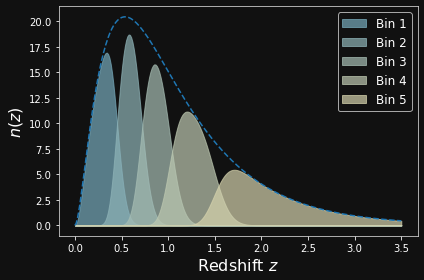

In [15]:
plot(z, nz(z)*nz.gals_per_arcmin2, '--')
for i,b in enumerate(nz_bins):
    fill_between(z, (b(z)*b.gals_per_arcmin2).min(), b(z)*b.gals_per_arcmin2, alpha=0.7, color=palette1[i],label="Bin %d"%(i+1))

xlabel('Redshift $z$',fontsize=16)
ylabel('$n(z)$',fontsize=16)
legend(fontsize='large')
plt.tight_layout()
#plt.savefig('../figures/redshift_distribution_light.png',dpi=200, transparent = True)
